In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram



Measurement counts: {'10': 490, '01': 510}


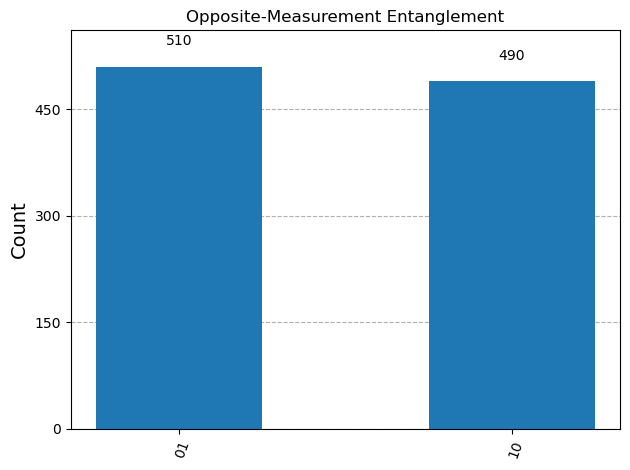

In [ ]:
# 1. Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# 2. Prepare Qubit 0 in the |+⟩ state (superposition)
qc.h(0)

# 3. Apply a CNOT gate to entangle the qubits
# Control qubit is 0, target qubit is 1
qc.cx(0, 1)

# At this point, the circuit has created the Bell state (|00⟩ + |11⟩)/√2.
# This state shows correlation, but not strictly opposite measurements.

# 4. Apply an X gate to the second qubit AFTER entanglement
qc.x(1)

# After the X gate:
# The Bell state (|00⟩ + |11⟩)/√2
# Applying X on the second qubit transforms:
# |00⟩ -> |01⟩
# |11⟩ -> |10⟩
# The resulting entangled state is (|01⟩ + |10⟩)/√2.
# In this state, measuring the two qubits will always yield opposite results.

# 5. Measure both qubits
qc.measure([0, 1], [0, 1])

# 6. Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# Run the simulation with 1000 shots
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)

# 7. Print the counts
print("Measurement counts:", counts)

# 8. Plot the histogram
plot_histogram(counts, title="Opposite-Measurement Entanglement")